# Distribution Example
Author: Michael D. Shields
Date: 8/16/18

Illustrates the Distribution class of UQpy for a lognormal distribution

Import the necessary modules

In [1]:
from UQpy.Distributions import Distribution
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

Define the lognormal distribution with parameters $\sigma=5$ and $\mu=1$

In [3]:
dist = Distribution(name='lognormal')
print(dist.name)

lognormal


Plot the pdf of the distribution. 
Notice that when calling the pdf, the parameters of the distribution must be specified.

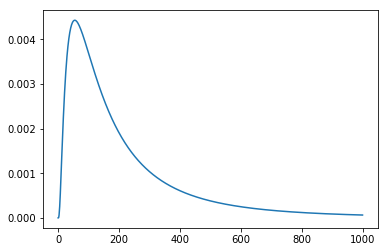

In [4]:
x = np.linspace(0.01,1000,1000)
plt.plot(x, dist.pdf(x, params=[5,1, 0]))
plt.show()

Print the mean, standard deviation, skewness, and kurtosis of the distribution.
Notice that when calling the moments of the distribution, the paramaters must be specified.

In [5]:
print(dist.moments(params=[5,1, 0]))

[array(244.69193226422038), array(102880.64970380608), array(6.184877138632554), array(110.9363921763115)]


Plot the log pdf of the distribution. 
Notice that when calling the log_pdf, the parameters of the distribution must be specified.

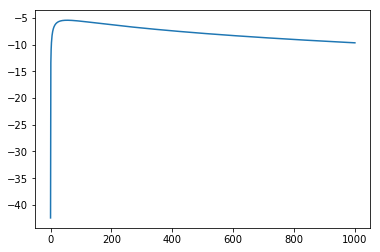

In [6]:
plt.plot(x, dist.log_pdf(x, params=[5,1, 0]))
plt.show()

Generate 1000 random samples from the lognormal distribution.
Notice that when calling rvs, both the parameters and the number of samples must be specified.

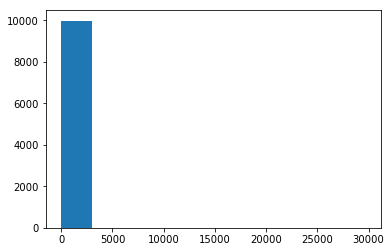

In [7]:
y = dist.rvs(params=[5,1, 0],nsamples=10000)
plt.hist(y)
plt.show()

Estimate the parameters of the lognormal distribution based on the samples generated above. Notice that fit returns three parameters (s, loc, and scale) that correspond to the scipy.stats parameters for the distribution.

In [8]:
print(dist.fit(y))

[4.9980406188631656, 0.9994675581632283, 0]


Notice that the parameters do not necessarily match those specified. This is because fit is identifying 3 parameters whereas our lognormal dp

/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1649: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


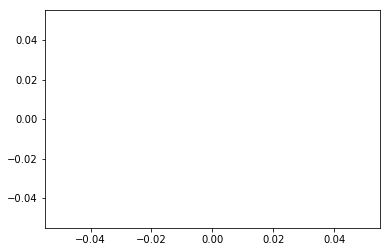

In [9]:
plt.plot(x,scipy.stats.lognorm.pdf(x, s=dist.fit(y)[0], loc=dist.fit(y)[1], scale=dist.fit(y)[2] ))
plt.show()